# First Implementation of Potential Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def pot_func(q_ij, r_max):
    norm_q_ij = np.linalg.norm(q_ij,2)
    if norm_q_ij <= r_max:
        return r_max/(norm_q_ij*(r_max-norm_q_ij))
        # return r_max/(norm_q_ij*(1 - norm_q_ij/r_max))
    else:
        #return norm_q_ij/(r_max*(norm_q_ij/r_max-1))
        #return (norm_q_ij/r_max -1)**2
        return np.sqrt(norm_q_ij -r_max)
        #return np.log(norm_q_ij-r_max+1)

In [2]:
def gradient(q_ij, r_max):
    norm_q_ij = np.linalg.norm(q_ij,2)
    if norm_q_ij <= r_max:
        return -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)
    else:
        #return -2*(r_max- norm_q_ij)
        # return 1/(norm_q_ij-r_max+1)
        return 1/np.sqrt(norm_q_ij-r_max)

In [3]:
def plot_pot_and_grad(x_ij_list, y_ij_list, r_max):
    q_ij_list = [np.array([x_ij,y_ij]) for x_ij, y_ij in zip(x_ij_list,y_ij_list)]
    psi = [pot_func(q_ij, r_max) for q_ij in q_ij_list]
    phi = [gradient(q_ij, r_max) for q_ij in q_ij_list]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    z_range = [np.linalg.norm(q_ij) for q_ij in q_ij_list]
    z_plot, phi_plot = zip(*sorted(zip(z_range, phi)))
    # First plot: gradient along vector pointing to other platform
    # grad < 0: repulsion
    # grad > 0: attraction
    ax1.plot(z_plot, phi_plot)
    ax1.set_ylabel(r"$\phi_{\alpha}$")
    ax1.grid(axis="both", linestyle="--")
    ax1.set_ylim(-5,5)
    ax1.set_title("Gradient of Pot. Func.")
    ax1.set_xlabel(r"$\Vert z_i - z_j \Vert$")

    # Second plot: potential function
    z_plot, psi_plot = zip(*sorted(zip(z_range, psi)))
    ax2.plot(z_plot,psi_plot)
    ax2.set_ylabel(r"$\psi_{\alpha}$")
    ax2.set_ylim(0,10)
    ax2.set_title("Potential Function")
    ax2.set_xlabel(r"$\Vert z_i - z_j \Vert$")
    
    ax2.grid(axis="both", linestyle="--")
    plt.plot()
    plt.tight_layout()

Plot over range where maximum communication range = 9

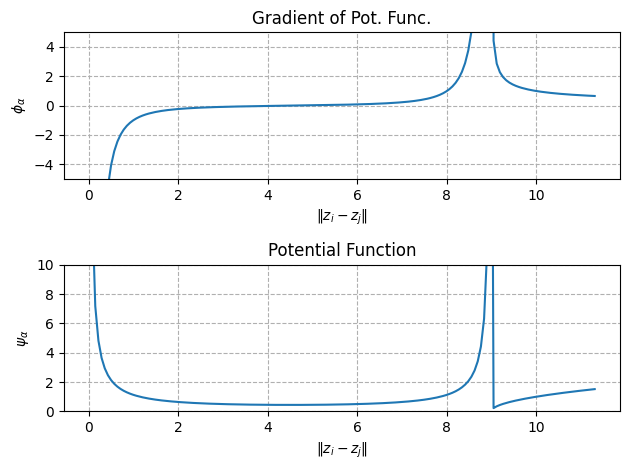

In [4]:
lim = 8
precision = 5e-2
x_ij = np.arange(-lim,lim,precision)
y_ij = np.arange(-lim, lim,precision)
plot_pot_and_grad(x_ij_list=list(x_ij), y_ij_list=list(y_ij), r_max=9)

# Actual Potential Function: Plots for CDC and Thesis

In [5]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Optional
import random
from ocean_navigation_simulator.utils.plotting_utils import set_palatino_font, set_palatino_font_plotly
set_palatino_font("ocean_navigation_simulator/package_data/font/Palatino_thin.ttf")
set_palatino_font_plotly("ocean_navigation_simulator/package_data/font/Palatino_thin.ttf")

Layout({
    'font': {'family': 'Palatino', 'size': 21},
    'legend': {'font': {'family': 'Palatino', 'size': 25}},
    'title': {'font': {'family': 'Palatino', 'size': 30}},
    'xaxis': {'tickfont': {'family': 'Palatino', 'size': 13}, 'title': {'font': {'family': 'Palatino', 'size': 25}}},
    'yaxis': {'tickfont': {'family': 'Palatino', 'size': 13}, 'title': {'font': {'family': 'Palatino', 'size': 25}}}
})

In [6]:
def potential_func(norm_qij: float, inside_range: bool, r_min, r_max, kappa: Optional[int]=1) -> float:
    """Potential function responsible for the attraction repulsion behavior between platforms

    Args:
        norm_qij (float): the euclidean norm of the distance between platform i and j
        inside_range (bool): if the distance between i and j is within the interaction/communication range

    Returns:
        float: value of the potential function
    """
    L = r_max -r_min
    if inside_range:
       # psi = (norm_qij-r_min)**2/(L**2 - (norm_qij-r_min)**2) - 2 #(L**2 - (norm_qij-r_min)**2)/(norm_qij-r_min)**2 + \
                #(norm_qij-r_min)**2/(L**2 - (norm_qij-r_min)**2) - 2
       # return psi
        return kappa*(r_max / (norm_qij * (r_max - norm_qij)))
    else:
        #return np.log((norm_qij - r_max + 1)**2)
        #return (norm_qij-r)**2
        return np.sqrt(norm_qij - r_max)

In [7]:
def plot_pot_func(r_min: float,
    r_max: float,
    max_plot_factor: Optional[float] = 1.5,
    step: Optional[int] = 0.025,
    savefig: Optional[bool] = False,
    savefig_format: Optional[str] = '.png',
):
    """Plot function to display the potential function psi and the gradient function phi

    Args:
        max_plot_factor (Optional[int], optional): _description_. Defaults to 1.5.
        step (Optional[int], optional): _description_. Defaults to 0.05.
        savefig (Optional[bool], optional): _description_. Defaults to False.
    """
    z_range = np.arange(start=0, stop= r_max * max_plot_factor, step=step)
    inside_range_arr = np.where(z_range < r_max, 1, 0)
    psi = [
        potential_func(norm_qij=z, inside_range=indicator, r_min=r_min, r_max=r_max)
        for z, indicator in zip(z_range, inside_range_arr)
    ]
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    fig.subplots_adjust(bottom=0.2)
    ax.plot(z_range, psi)
    fig.set_size_inches(10, 8)
    ax.set_ylabel(r"$\psi \left(\Vert q_i - q_j \Vert \right)$")
    ax.set_xticks([r_max / 2, r_max])
    # ax.set_xticklabels([r"$\dfrac{R_{com}}{2}$", r"$R_{com}$"])
    ax.set_xticklabels([r"$R_{com}/2$", r"$R_{com}$"], fontsize=18)
    ax.text(0.25,30, r"Avoid", fontsize=16)
    ax.text(0.25,28, r"collisions",fontsize=16)
    ax.text(6.75,30, r"High",fontsize=16)
    ax.text(6.75,28, r"Attraction",fontsize=16)
    ax.text(10.4,30, r"Low",fontsize=16)
    ax.text(10.4,28, r"Attraction",fontsize=16)
    ax.text(3.5,30, 'Low',fontsize=16)
    ax.text(3.5,28, 'Interference',fontsize=16)
    ax.axvline(x=2.5, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.axvline(x=6.5, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.axvline(x=12.5, color='black', linestyle='--', alpha=0.5, linewidth=1)
    ax.set_xlabel(r"$\Vert q_i - q_j \Vert$")
    ax.set_title('Potential Function '+ r'$\Psi_{ij}$')
    ax.grid(axis="both", linestyle="--", alpha=0.2)
    if savefig:
        plt.tight_layout()
        plt.savefig("plot_pot_func_ours"+ savefig_format, dpi=400)

/tmp/ipykernel_1936/3832801485.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  return kappa*(r_max / (norm_qij * (r_max - norm_qij)))


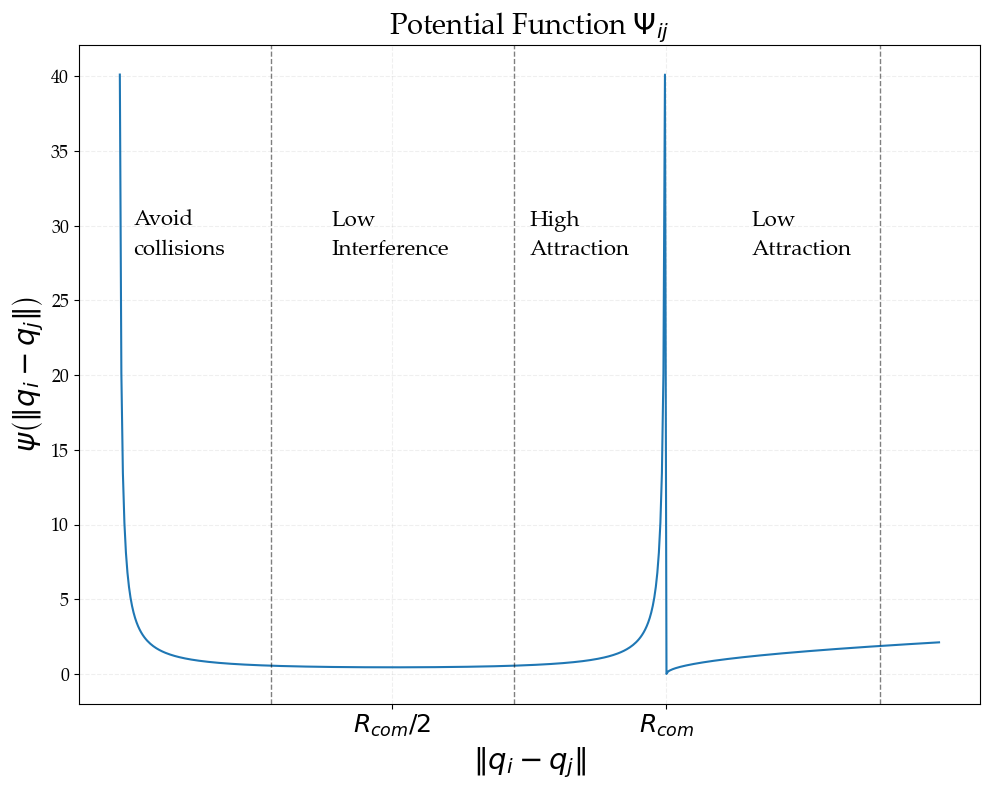

In [8]:
plot_pot_func(r_min=0, r_max=9, savefig=True, savefig_format='.pdf')

/tmp/ipykernel_1936/3832801485.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  return kappa*(r_max / (norm_qij * (r_max - norm_qij)))
/tmp/ipykernel_1936/3832801485.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  return kappa*(r_max / (norm_qij * (r_max - norm_qij)))
/tmp/ipykernel_1936/3832801485.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  return kappa*(r_max / (norm_qij * (r_max - norm_qij)))
/tmp/ipykernel_1936/3832801485.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  return kappa*(r_max / (norm_qij * (r_max - norm_qij)))


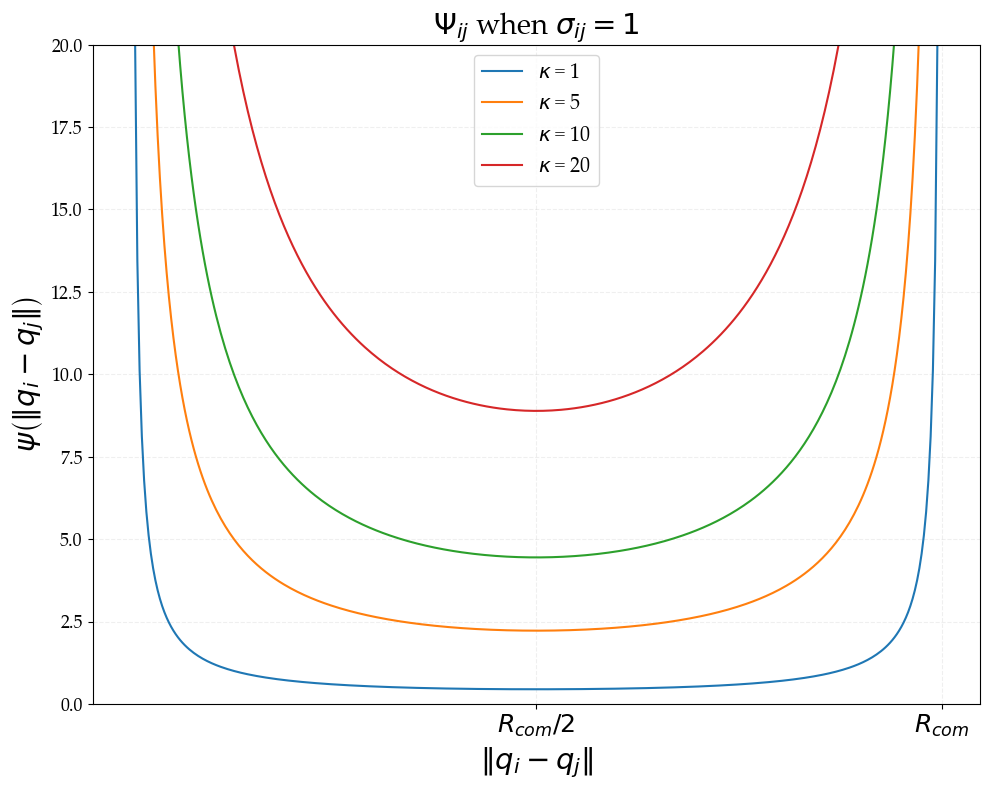

In [9]:
from ocean_navigation_simulator.utils.plotting_utils import set_palatino_font, set_palatino_font_plotly
set_palatino_font("ocean_navigation_simulator/package_data/font/Palatino_thin.ttf")
r_max = 9
r_min=0
max_plot_factor = 1
step= 0.025
z_range = np.arange(start=0, stop= r_max * max_plot_factor, step=step)
inside_range_arr = np.where(z_range < r_max, 1, 0)
kappa = [1,5,10, 20]
fig, ax = plt.subplots(1, 1)
for k in kappa:
    psi = [
        potential_func(norm_qij=z, inside_range=indicator, r_min=r_min, r_max=r_max, kappa=k )
        for z, indicator in zip(z_range, inside_range_arr)
    ]
    ax.plot(z_range, psi, label=r'$\kappa$ = '+str(k))
# limit range of ylabel to 
ax.set_ylim([0, 20])
# plot legend
ax.legend()
ax.set_xticks([r_max / 2, r_max])
fig.set_size_inches(10, 8)
ax.tick_params(axis='x', labelsize=18)
# ax.set_xticklabels([r"$\dfrac{R_{com}}{2}$", r"$R_{com}$"])
ax.set_xticklabels([r"$R_{com}/2$", r"$R_{com}$"])
ax.set_xlabel(r"$\Vert q_i - q_j \Vert$")
ax.set_title(r'$\Psi_{ij}$' + ' when '  r'$\sigma_{ij}=1$')
ax.grid(axis="both", linestyle="--", alpha=0.2)
ax.set_ylabel(r"$\psi \left(\Vert q_i - q_j \Vert \right)$")
plt.tight_layout()
plt.savefig("plot_pot_func_kappa.pdf")

# Normalization and Weighting coefficient analysis

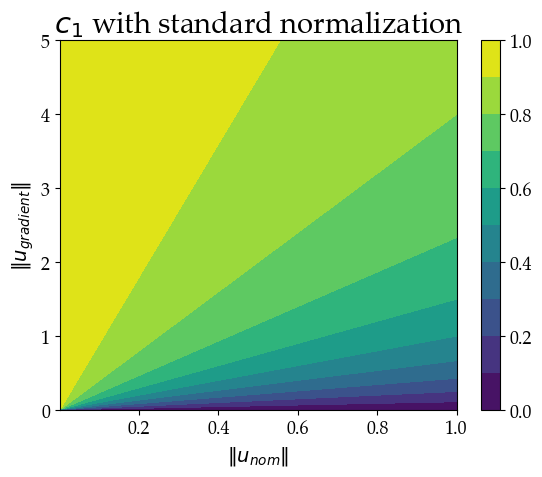

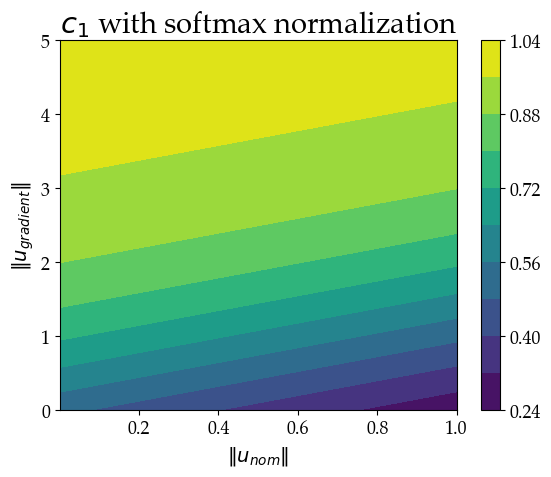

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def c1(unom, ugrad):
    return ugrad / (unom + ugrad)
def softmax(array: np.ndarray) -> np.ndarray:
    """Basic implementation of a softmax
    Subtract the maximum for numerical stability and avoid large numbers

    Args:
        array (np.ndarray): array containing the different magnitudes

    Returns:
        np.ndarray: Softmax output in the same order as the original order
    """
    e_x = np.exp(array - np.max(array))
    return e_x / e_x.sum(axis=0)

# Generate some sample data for the function
x = np.linspace(1e-10, 1, 200)
y = np.linspace(1e-10, 5, 200)
X, Y = np.meshgrid(x, y)
Z = c1(X, Y)
Zsoftmax = softmax(np.array([X, Y]))[1]
# Plot the function as a 3D surface
fig, ax = plt.subplots()
cp = ax.contourf(X, Y, Z, cmap='viridis', levels=10)
cbar = plt.colorbar(cp) # Add a colorbar
# cbar.set_ticks([0,0.3, 0.5, 0.75, 1.05])
# cbar.set_ticklabels([0, 0.25, 0.5, 0.75, 1])
ax.set_xlabel(r"$\Vert u_{nom} \Vert$",fontsize=14)
ax.set_ylabel(r"$\Vert u_{gradient} \Vert$",fontsize=14)
ax.set_title(r"$c_1$ with standard normalization")
plt.show()

# Plot the function as a 3D surface
fig, ax2 = plt.subplots()
cp = ax2.contourf(X, Y, Zsoftmax, cmap='viridis', levels=10)
cbar = plt.colorbar(cp) # Add a colorbar
# cbar.set_ticks([0,0.3, 0.5, 0.75, 1.05])
# cbar.set_ticklabels([0, 0.25, 0.5, 0.75, 1])
ax2.set_xlabel(r"$\Vert u_{nom} \Vert$", fontsize=14)
ax2.set_ylabel(r"$\Vert u_{gradient} \Vert$", fontsize=14)
ax2.set_title(r"$c_1$ with softmax normalization")
plt.show()


## Comparison of safety weighting functions when the performance controller u_perf magnitude is fixed (i.e. as it is the case with HJ where it is = 1)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def standard_norm(unom, ugrad):
    return ugrad / (unom + ugrad)

def softmax(array: np.ndarray) -> np.ndarray:
    """Basic implementation of a softmax
    Subtract the maximum for numerical stability and avoid large numbers

    Args:
        array (np.ndarray): array containing the different magnitudes

    Returns:
        np.ndarray: Softmax output in the same order as the original order
    """
    e_x = np.exp(array - np.max(array))
    return e_x / e_x.sum(axis=0)

def plot_comparison_weighting_mthd(u_perf_mag: float):
    # Generate some sample data for the function
    x = np.linspace(1e-15, 10*u_perf_mag, 500)
    y = np.ones(x.shape[0])*u_perf_mag
    c1_standard = standard_norm(y,x)
    c1_softmax = softmax(np.array([x, y]))[0]

    fig, ax = plt.subplots()
    # change figure size
    fig.set_size_inches(10, 6)
    ax.plot(x, c1_standard, label="standard normalization")
    ax.plot(x, c1_softmax, label="softmax normalization")
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels([r"$u_{perf}$", 0.5, r"$u_{safe}$"])
    ax.legend()
    ax.grid(alpha=0.5)
    ax.set_xlabel(r"$\Vert u_{safe} \Vert$", fontsize=14)
    # plot a xtick at the value of unom with label 'u_{nom}'
    ax.axvline(x=u_perf_mag, color='k', linestyle='--', alpha=0.5)
    # add a text at the xtick on the x axis
    # add xtick labels to the plot
    ax.set_xticks([0, u_perf_mag, 2*u_perf_mag, 5*u_perf_mag, 10*u_perf_mag])
    # add text labels to the xticks
    ax.set_xticklabels([0, r"$u_{perf}$", r"$2u_{perf}$", r"$5u_{perf}$", r"$10u_{perf}$"])
    ax.set_title("with "+ r"$u_{perf}$ = " + str(u_perf_mag) + " fixed ")
    plt.show()


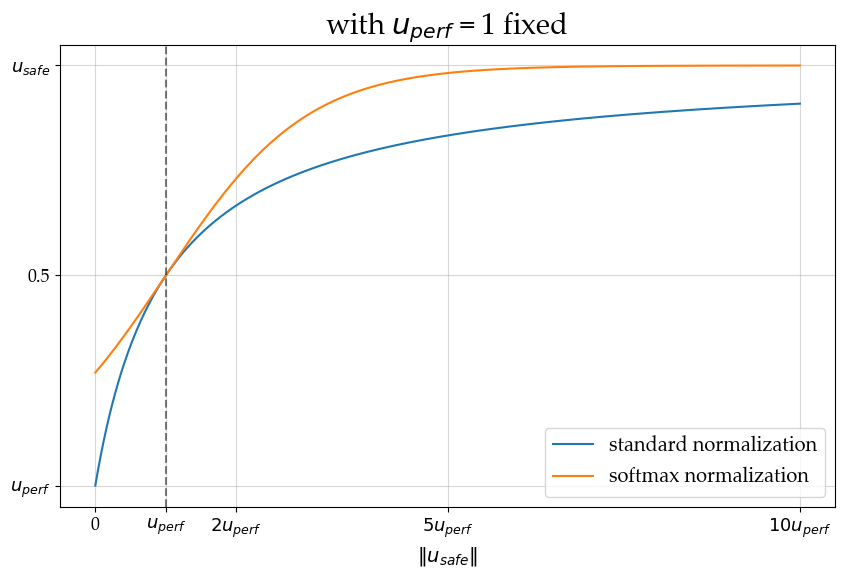

In [12]:
plot_comparison_weighting_mthd(u_perf_mag=1)

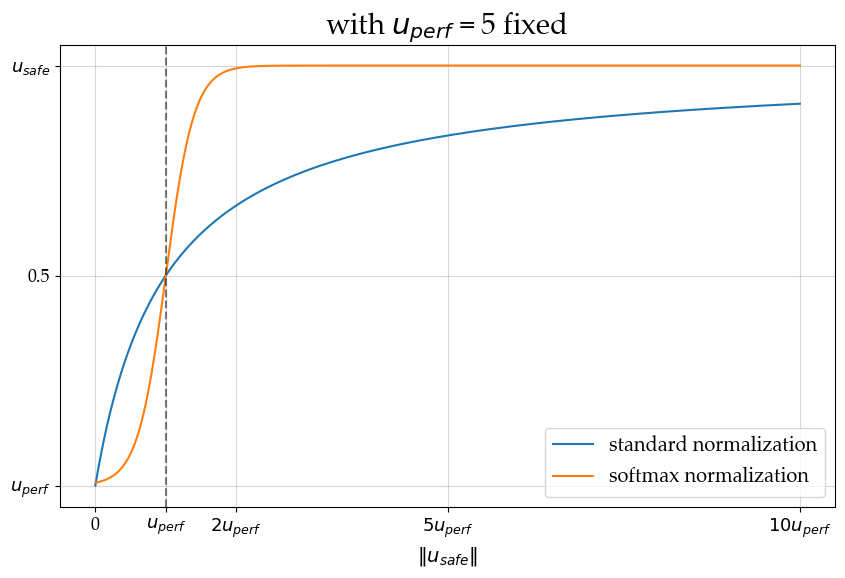

In [13]:
plot_comparison_weighting_mthd(u_perf_mag=5)

## Tuning of Softmax vs safety weighting factor c1

findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.


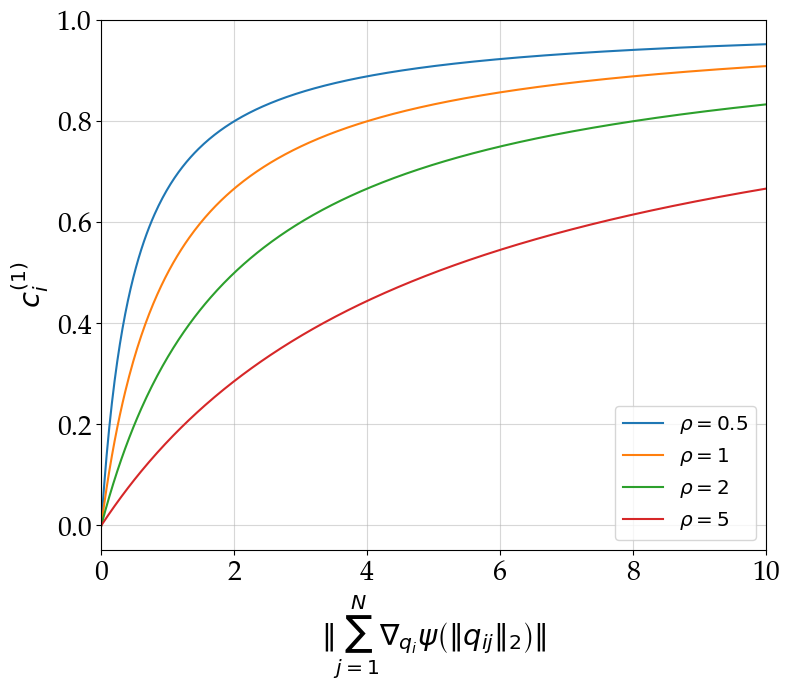

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from ocean_navigation_simulator.utils.plotting_utils import set_palatino_font, set_palatino_font_plotly
set_palatino_font("ocean_navigation_simulator/package_data/font/Palatino_thin.ttf")

def standard_norm(unom, ugrad):
    return ugrad / (unom + ugrad)

def softmax(array: np.ndarray) -> np.ndarray:
    """Basic implementation of a softmax
    Subtract the maximum for numerical stability and avoid large numbers

    Args:
        array (np.ndarray): array containing the different magnitudes

    Returns:
        np.ndarray: Softmax output in the same order as the original order
    """
    e_x = np.exp(array - np.max(array))
    return e_x / e_x.sum(axis=0)

rho = [0.5, 1, 2, 5]

fig, ax = plt.subplots()
# change figure size
fig.set_size_inches(8, 7)

for r in rho:
    # Generate some sample data for the function
    x = np.linspace(1e-15, 10, 500)
    y = np.ones(x.shape[0]) * r
    c1_standard = standard_norm(y, x)
    c1_softmax = softmax(np.array([x, y]))[0]

    ax.plot(x, c1_standard, label=r"$\rho={}$".format(r))

#ax.set_yticks([0, 0.5, 1])
#ax.set_yticklabels([r"$u_{i}^{perf}$", 0.5, r"$u_{i}^{safe}$"])
ax.set_ylabel(r"$c_{i}^{(1)}$", fontname="Palatino")
# increase font of xtick labels
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.legend()
ax.grid(alpha=0.5)
# set x range to 0, 10
ax.set_xlim(0, 10)
ax.set_xlabel(r"$\left \Vert  \sum_{j=1}^N \nabla_{{q}_i} \psi\left(\Vert {q}_{i j}\Vert_2\right) \right \Vert $", fontname="Palatino")
plt.tight_layout()
plt.savefig("weightingAlphasStandard.pdf")
plt.show()
